<a href="https://colab.research.google.com/github/Smith-S-S/pytorch_tuto/blob/main/py_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch

In [19]:
2 + 2

4

In [20]:
import torch

# **Basic operations**

In [21]:
torch_1 = torch.arange(4)
torch_1

tensor([0, 1, 2, 3])

In [22]:
# reshape
torch_1.reshape(2,2)

tensor([[0, 1],
        [2, 3]])

In [23]:
torch_2 = torch.arange(12)
torch_2

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [24]:
# need to reshape using -1

r_1 = torch_2.reshape(2,-1)
r_2 = torch_2.reshape(3,-1)
r_3 = torch_2.reshape(4,-1)

print(r_1)
print()
print(r_2)
print()
print(r_3)
print("-----changing the row-----")
r_4 = torch_2.reshape(-1,2)
print(r_4)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
-----changing the row-----
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])


In [25]:
# if we update any of the orginal variable it changes the full

In [26]:
print(r_3)

r_3[1] = 44
r_3

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


tensor([[ 0,  1,  2],
        [44, 44, 44],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [27]:
s = torch.arange(6)
s[0] = 55
s = s.reshape(2,-1)
s

tensor([[55,  1,  2],
        [ 3,  4,  5]])

In [28]:
s[:,0:]

tensor([[55,  1,  2],
        [ 3,  4,  5]])

In [29]:
sm = torch.arange(6)
sm = sm.reshape(2,3)
sm

tensor([[0, 1, 2],
        [3, 4, 5]])

In [30]:
torch.add(s,sm)

tensor([[55,  2,  4],
        [ 6,  8, 10]])

In [31]:
torch.multiply(s,sm)

tensor([[ 0,  1,  4],
        [ 9, 16, 25]])

In [32]:
torch.mul(s,sm)

tensor([[ 0,  1,  4],
        [ 9, 16, 25]])

In [33]:
torch.div(s,sm)

tensor([[inf, 1., 1.],
        [1., 1., 1.]])

In [34]:
torch.remainder(sm,s)

tensor([[0, 0, 0],
        [0, 0, 0]])

In [35]:
result = torch.zeros_like(s, dtype=s.dtype)  # Create a tensor of zeros with the same shape and type as s
result

tensor([[0, 0, 0],
        [0, 0, 0]])

In [36]:

mask = sm != 0  # Create a mask where elements are True if sm is not 0, otherwise False
mask

tensor([[False,  True,  True],
        [ True,  True,  True]])

In [37]:
result[mask] = torch.remainder(s[mask], sm[mask])  # Calculate the remainder only for elements where sm is not 0

print(result)

tensor([[0, 0, 0],
        [0, 0, 0]])


In [38]:
s[mask]

tensor([1, 2, 3, 4, 5])

In [39]:
s

tensor([[55,  1,  2],
        [ 3,  4,  5]])

In [40]:
sm[mask]

tensor([1, 2, 3, 4, 5])

In [41]:
sm

tensor([[0, 1, 2],
        [3, 4, 5]])

In [42]:
# add and asign the result on the val
print(s,"\n")
s.add_(sm)
print(s)

tensor([[55,  1,  2],
        [ 3,  4,  5]]) 

tensor([[55,  2,  4],
        [ 6,  8, 10]])


# NN MOdel

## simple iris classification

```
The feature (input) we are passing in to the nn
```

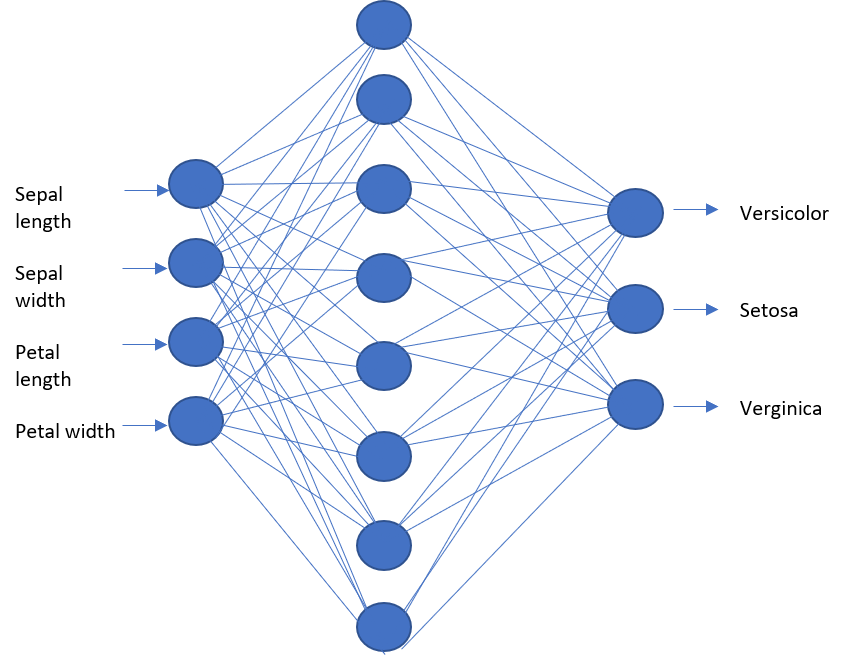



In [43]:
import torch.nn as nn
import torch.nn.functional as F # helps to move the data forward

In [59]:
class Model(nn.Module):
  # we are passing 4 features ----> hiddden layes (h1) ---> output with [3 classification]
  def __init__(self, input_s = 4, h1 = 8, output_s  = 3):
    super().__init__()
    # 1st input layer (fully connected)
    self.fc1 = nn.Linear(input_s, h1) # moving the input to h1
    self.out1 = nn.Linear(h1, output_s)

  def forward_pass(self, x):
    x = F.relu(self.fc1(x))
    x = self.out(x)
    return x



In [45]:
torch.manual_seed(41) # seting randomaisation
model =  Model()

### time to create the dataset

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [47]:
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(dataset_url)

In [48]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


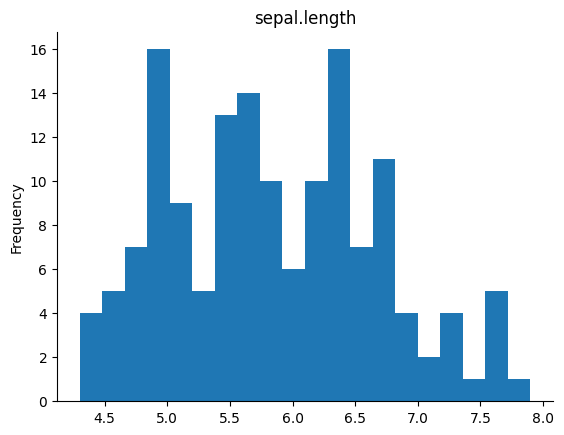

In [49]:
# @title sepal.length

from matplotlib import pyplot as plt
my_df['sepal.length'].plot(kind='hist', bins=20, title='sepal.length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [50]:
my_df["variety"] = my_df["variety"].replace({"Setosa":0, "Versicolor":1, "Virginica":2})

<ipython-input-50-a7788e56f744>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["variety"] = my_df["variety"].replace({"Setosa":0, "Versicolor":1, "Virginica":2})


In [51]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
 x = my_df.drop("variety", axis = 1)
 y = my_df["variety"]

In [53]:
X = x.values
Y = y.values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 41)

In [55]:
X_train= torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)



In [56]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [62]:
model.parameters()

<generator object Module.parameters at 0x7f1f62e8e180>

In [58]:
epoch = 100
loss = []
for i in range(epoch):
  y_pred =  model.forward_pass(X_train)
  loss_cal = loss_function(y_pred, Y_train)
  loss.append(loss_cal.detach().numpy())

  if i % 10 == 0:
    print(f"epoch {i} loss is {loss_cal}")

  optimizer.zero_grad()
  loss_cal.backward()
  optimizer.step()





AttributeError: 'Model' object has no attribute 'out'